In [18]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the 'scripts' folder to the Python path
sys.path.append(os.path.abspath('../scripts'))
# Import the preprocessing functions from preprocess_data.py
from preprocess_data import preprocess_crashes_data_key_attributes, preprocess_vehicle_crash_data_key_attributes, party_type_mapping, sobriety_mapping, collision_type_mapping

# Load the datasets
crashes_df = pd.read_csv('../data/raw/crashdata2022-present.csv')
vehicle_crashes_df = pd.read_csv('../data/raw/vehiclecrashdata2022-present.csv')

# Apply preprocessing to the crash data
preprocessed_crashes_data = preprocess_crashes_data_key_attributes(crashes_df)
preprocessed_vehicle_data = preprocess_vehicle_crash_data_key_attributes(vehicle_crashes_df)
preprocessed_vehicle_data['PartyType_Code'] = preprocessed_vehicle_data['PartyType_Code'].astype(int)

print("Preprocessing complete.")

Preprocessing complete.


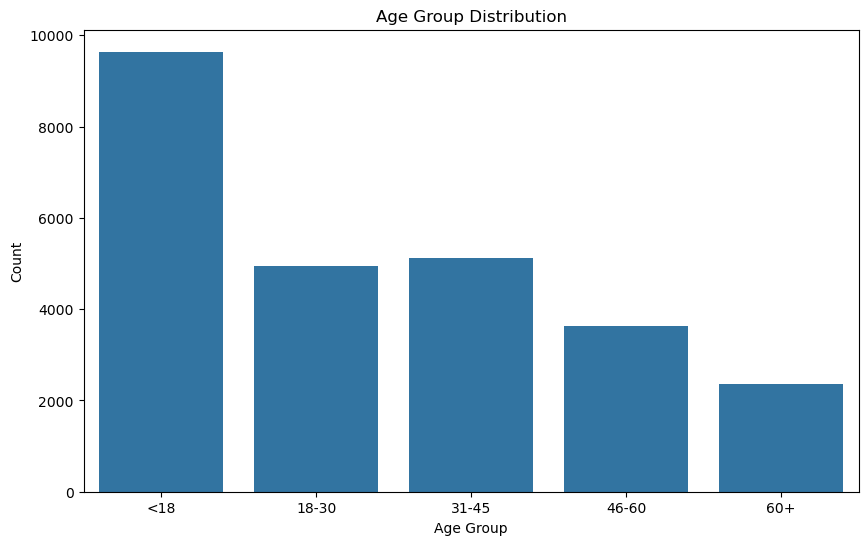

In [19]:
# Visualize Age Group Distribution from preprocessed vehicle data
plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_vehicle_data, x='AgeGroup')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

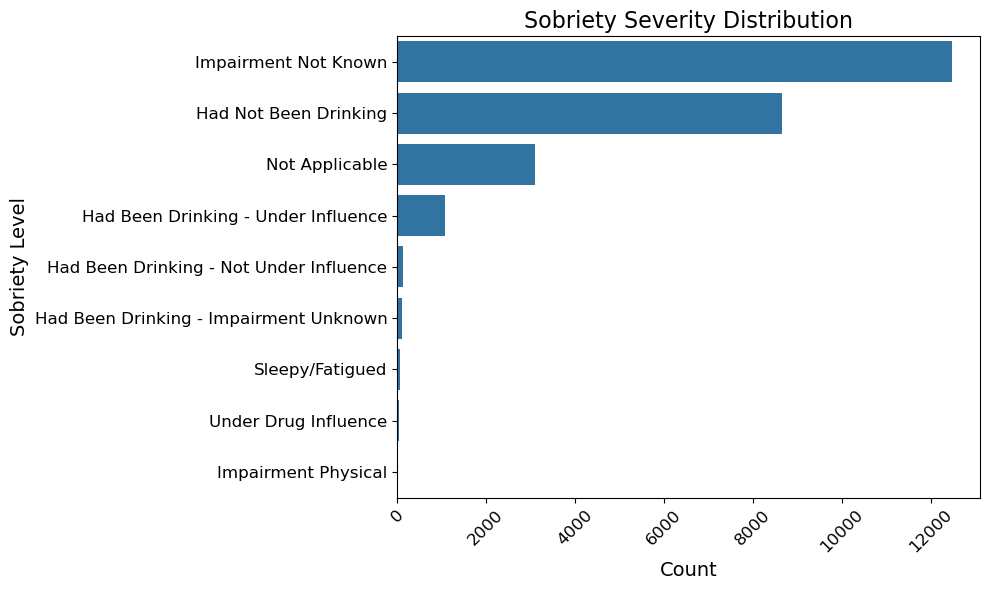

In [20]:
sobriety_reverse_mapping = {v: k for k, v in sobriety_mapping.items()}

# Replace Sobriety_Code with their corresponding labels
preprocessed_vehicle_data['Sobriety_Label'] = preprocessed_vehicle_data['Sobriety_Code'].map(sobriety_reverse_mapping)

# Visualize Sobriety Severity Distribution with decoded labels
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.countplot(
    data=preprocessed_vehicle_data,
    y='Sobriety_Label',
    order=preprocessed_vehicle_data['Sobriety_Label'].value_counts().index  # Sort by count
)
plt.title("Sobriety Severity Distribution", fontsize=16)  # Larger font size for title
plt.xlabel("Count", fontsize=14)  # Replace 'Encoded' with actual labels
plt.ylabel("Sobriety Level", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Adjust font size for y-axis ticks
plt.tight_layout()
plt.show()

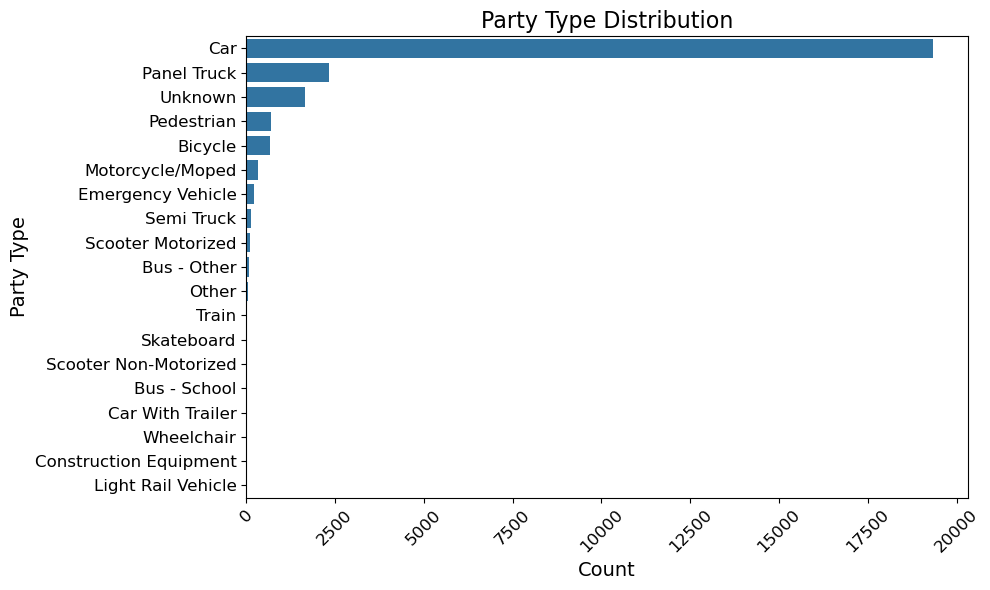

In [21]:
party_type_reverse_mapping = {v: k for k, v in party_type_mapping.items()}

# Replace PartyType_Code with their corresponding labels
preprocessed_vehicle_data['PartyType_Label'] = preprocessed_vehicle_data['PartyType_Code'].map(party_type_reverse_mapping)

# Visualize Party Type Distribution with decoded labels
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.countplot(
    data=preprocessed_vehicle_data,
    y='PartyType_Label',
    order=preprocessed_vehicle_data['PartyType_Label'].value_counts().index  # Sort by count
)
plt.title("Party Type Distribution", fontsize=16)  # Larger font size for title
plt.xlabel("Count", fontsize=14)  # Replace 'Encoded' with actual labels
plt.ylabel("Party Type", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Adjust font size for y-axis ticks
plt.tight_layout()
plt.show()

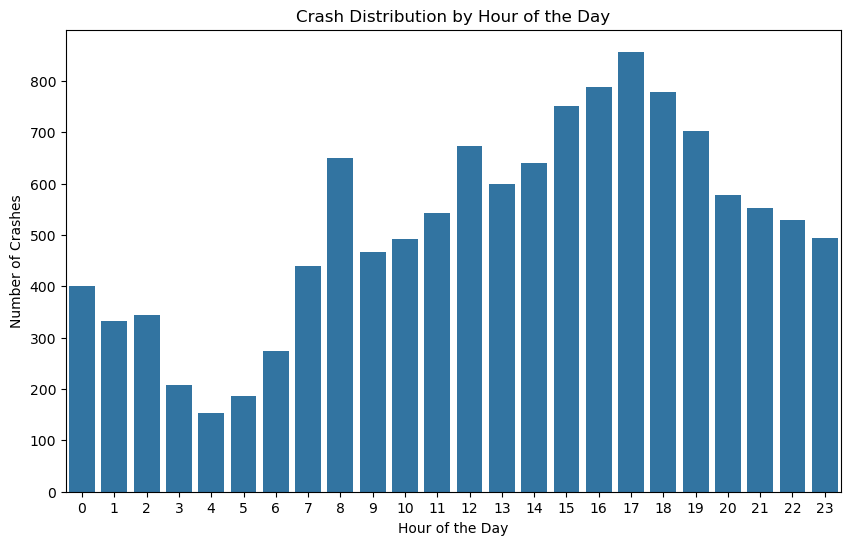

In [22]:
preprocessed_crashes_data['CrashTime'] = pd.to_datetime(preprocessed_crashes_data['CrashTime'], format='%H:%M', errors='coerce')

# Extract the hour from the 'CrashTime' column
preprocessed_crashes_data['CrashHour'] = preprocessed_crashes_data['CrashTime'].dt.hour

# Visualize the distribution of crashes by hour of the day (0-23)
plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_crashes_data, x='CrashHour', order=range(24))
plt.title("Crash Distribution by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crashes")
plt.xticks(range(24))  # Ensure the x-axis has tick marks for all 24 hours
plt.show()

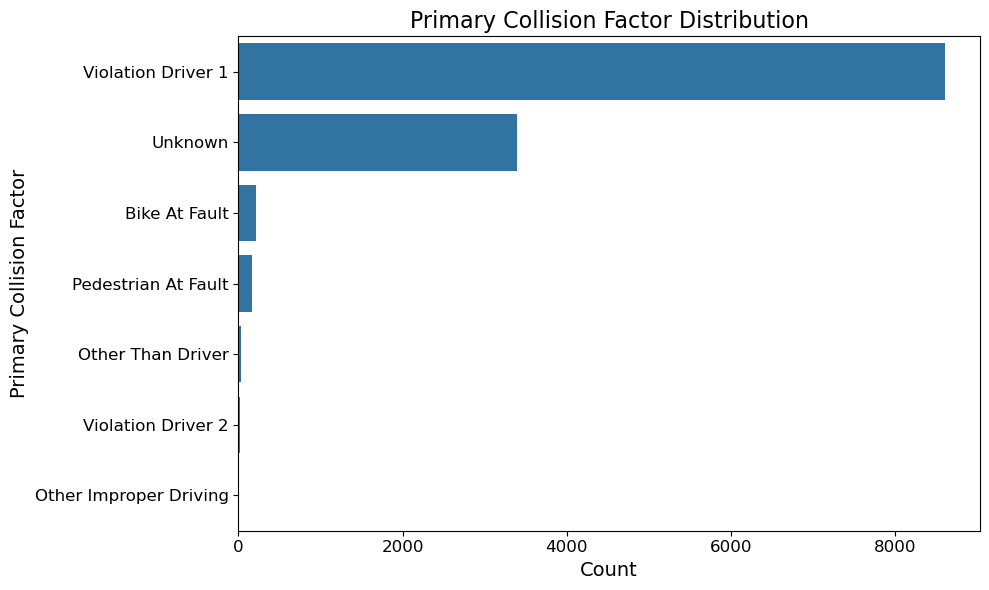

In [23]:
# Visualize Primary Collision Factor Distribution
plt.figure(figsize=(10, 6))  # Increase figure size
sns.countplot(
    data=preprocessed_crashes_data,
    y='PrimaryCollisionFactor',
    order=preprocessed_crashes_data['PrimaryCollisionFactor'].value_counts().index
)
plt.title("Primary Collision Factor Distribution", fontsize=16)  # Larger font size for title
plt.xlabel("Count", fontsize=14)  # Larger font size for x-axis label
plt.ylabel("Primary Collision Factor", fontsize=14)  # Larger font size for y-axis label
plt.xticks(fontsize=12)  # Adjust font size for x-axis ticks
plt.yticks(fontsize=12)  # Adjust font size for y-axis ticks
plt.tight_layout()  # Ensure everything fits well
plt.show()

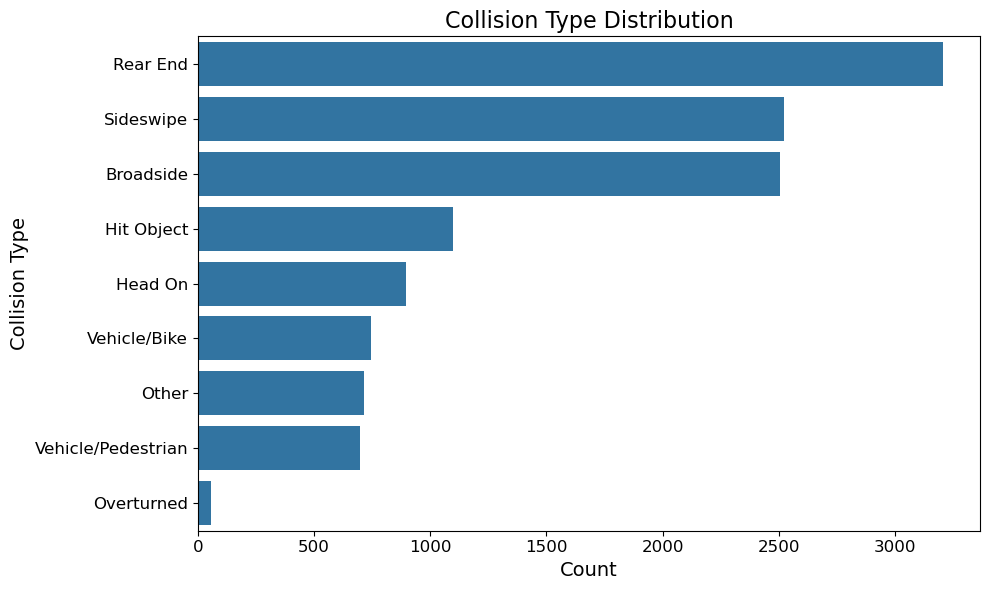

In [25]:
# Use CollisionType directly for the chart (no mapping needed)
collision_type_counts = preprocessed_crashes_data['CollisionType'].value_counts()

# Create a bar chart for CollisionType
plt.figure(figsize=(10, 6))
sns.countplot(
    data=preprocessed_crashes_data,
    y='CollisionType',
    order=collision_type_counts.index  # Sort by count
)
plt.title("Collision Type Distribution", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Collision Type", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


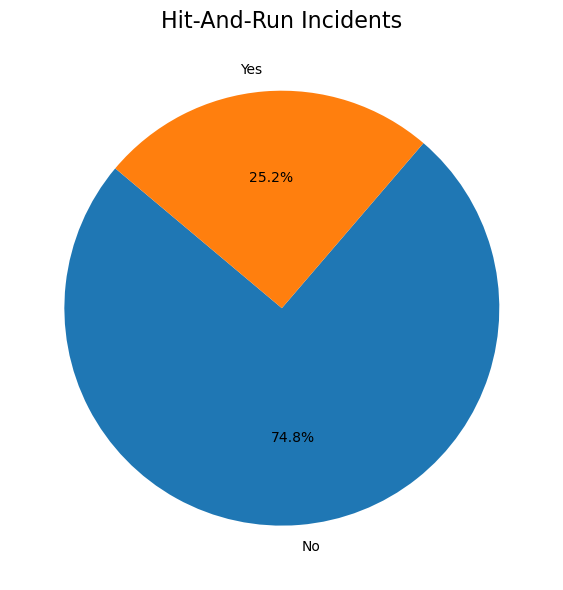

In [27]:
# Map 0 and 1 to meaningful labels
hit_and_run_labels = {0: 'No', 1: 'Yes'}
preprocessed_crashes_data['HitAndRun_Label'] = preprocessed_crashes_data['HitAndRunFlag'].map(hit_and_run_labels)

# Create a pie chart for HitAndRunFlag
plt.figure(figsize=(6, 6))
hit_and_run_counts = preprocessed_crashes_data['HitAndRun_Label'].value_counts()
hit_and_run_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=hit_and_run_counts.index)
plt.title("Hit-And-Run Incidents", fontsize=16)
plt.ylabel("")  # Remove y-axis label for cleaner presentation
plt.tight_layout()
plt.show()

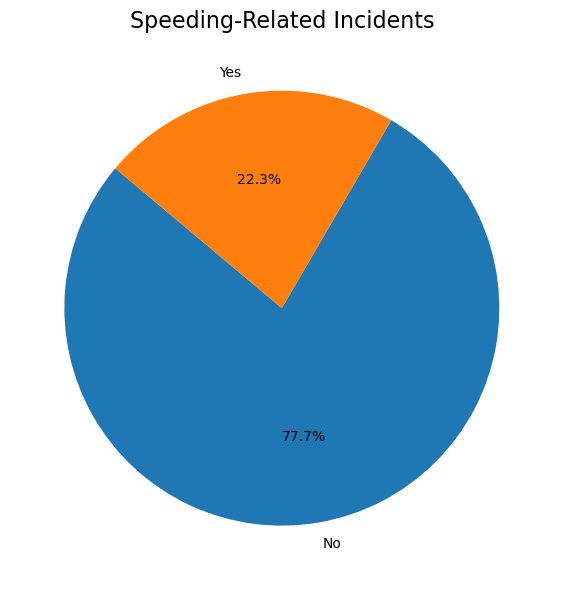

In [ ]:
# Map 0 and 1 to meaningful labels
speeding_labels = {0: 'No', 1: 'Yes'}
preprocessed_crashes_data['Speeding_Label'] = preprocessed_crashes_data['SpeedingFlag'].map(speeding_labels)

# Create a pie chart for SpeedingFlag
plt.figure(figsize=(6, 6))
speeding_counts = preprocessed_crashes_data['Speeding_Label'].value_counts()
speeding_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=speeding_counts.index)
plt.title("Speeding-Related Incidents", fontsize=16)
plt.ylabel("")  # Remove y-axis label for cleaner presentation
plt.tight_layout()
plt.show()